# Principal component analysis (PCA)
This notebook contains a walkthrough of PCA using the Sci-kit learn dataset: Digits for better understanding. <br>
The math will also be explained in this notebook.

**Loading Libraries and dataset**

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns


## Exploring the data
As with any task in Machine Learning, before implementing algorithms, we start by exploring the dataset first. <br>
We'll extract:
- Dimensionality (shape) 
- Features
- Mean
- Variance
- Basic stats

Number of NaN values in correlation matrix: 381
    Variance
0   0.000000
1   0.822540
2  22.595792
3  18.042611
4  18.371467
5  32.090422
6  11.054625
7   1.075564
8   0.008873
9  10.209757
            0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.3622

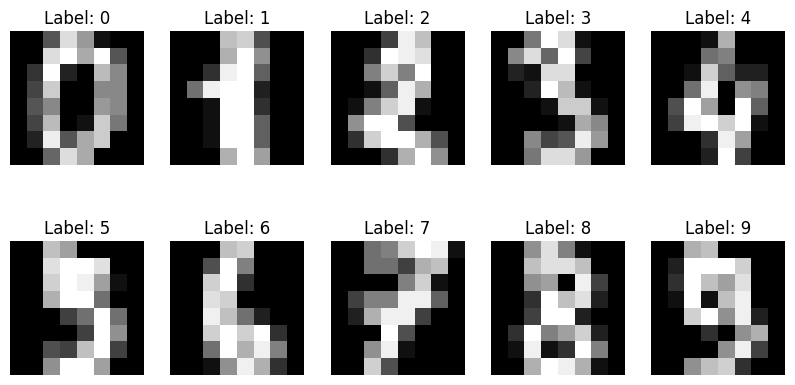

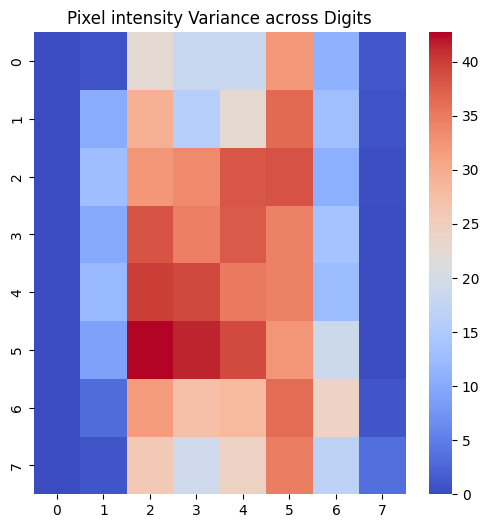

In [35]:
digits = load_digits()

# Extract features and target labels
X = digits.data
y = digits.target

# Get shape of data
data_shape = X.shape
target_shape = y.shape

df = pd.DataFrame(X)

df['target'] = y

# Compute variance
feature_variance = np.var(X, axis=0)

# Show first 10 variances
var = pd.DataFrame(feature_variance, columns=["Variance"]).head(10)

# Correlation matrix
corr_matrix = df.corr()

print("Number of NaN values in correlation matrix:", np.isnan(corr_matrix.values).sum())

# Variance
print(var)

# Basic description of data 
print(df.describe())

# Datatypes in the dataset
print(df.dtypes)

# Visualizing the digits
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for ax, img, label in zip(axes.ravel(), X[:10], y[:10]):
    ax.imshow(img.reshape(8,8), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()

# Visualizing the variance
pixel_variance = X.var(axis=0).reshape(8,8)
plt.figure(figsize=(6,6))
sns.heatmap(pixel_variance, cmap="coolwarm", annot=False)
plt.title("Pixel intensity Variance across Digits")
plt.show()

**Interpretation** <br>
From what we can see so far, our variance across digits visualization stems with the the actual visualization of the dataset. Not too much variance in the corners, but more towards the center. 

## Implementing PCA from Scratch
To implement the PCA, we will need to do the following things:
- Standardize the data
- Compute to covariance matrix  <br>
$Cov(X,Y) = \frac{1}{n}\sum^{n}_{i = 1}(x-\bar{x})(y-\bar{y})$
- Find eigenvalues and eigenvectors and sort them
- Project the data onto principal components

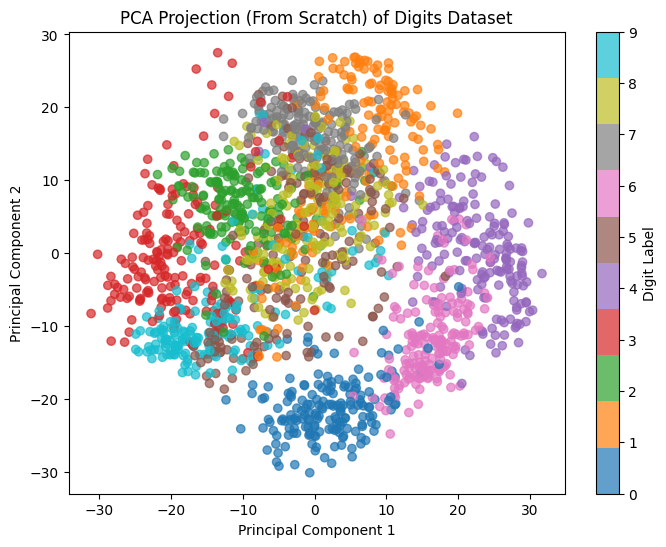

In [39]:
# Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort them
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Project the data onto principal components
# Choosing a k value 
k = 10
top_eigenvectors = eigenvectors[:,:k]
X_pca = np.dot(X_centered, top_eigenvectors)

# Plot it
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (From Scratch) of Digits Dataset")
plt.show()